In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.decomposition import PCA

# Question 3
## Part A
Read $64*64$ Face Images and create an $k*1$ array for each image.

In [2]:
## Read all images 
images = [ plt.imread(file) for file in glob.glob("dataset samples/FaceImages/*.jpg")]
images = np.array(images)

In [3]:
## get the shape of how our image data is 
images.shape

(70, 64, 64)

In [4]:
flattened_images = []
for img in images:
    processed_img = img.flatten().reshape(-1, 1)
    flattened_images.append(processed_img)

## convert again to numpy array
flattened_images = np.array(flattened_images)

In [5]:
flattened_images.shape

(70, 4096, 1)

Now we can see our images are converted into $4096*1$ image.

## Part B
To normalize the images we can just enable whiten option in PCA method and to find the best dimension count we can rely on eigenvalues. To find the best value for dimension we use $95\%$ of eigenvalues. This can reduce our data dimension with respect to save the most data.

In [6]:
## create the PCA model
model_pca = PCA(n_components=0.95, svd_solver='full', whiten=True)
## get the parameters to have them in mind
model_pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 0.95,
 'random_state': None,
 'svd_solver': 'full',
 'tol': 0.0,
 'whiten': True}

In [7]:
## fit the PCA to images and transform them into new dimension

## note that images be 1*4096 in sklearn 
## so we again reshape them
flat_reducable_images = []
for img in flattened_images:
    flat_reducable_images.append(img.flatten())

## convert to numpy
flat_reducable_images = np.array(flat_reducable_images)

reduced_images = model_pca.fit_transform(flat_reducable_images)

In [8]:
print(f"original image dimension: {len(flattened_images[0])}")
print(f"reduced image dimension: {model_pca.n_components_}")

original image dimension: 4096
reduced image dimension: 45


So we have found out that the best dimension for images dimension is $d = 45$.
## Part C
convert $25$ first eigenvectors as $64*64$ images and show them.

In [9]:
## get the first 25 eigenvectors
eigen_vectors = model_pca.components_[:25]
eigen_vectors.shape

(25, 4096)

In [10]:
def plot_images(rows, cols, images, figsize, title, padding=2.0):
    """
    plot multiple images using matplotlib.pyplot.subplots and show a title on each image with their counter

    INPUTS:
    --------
    rows: int bigger than 0,  number of rows in plot
    cols:  int bigger than 0, number of columns in plot
    images: numpy array, the images array
    figsize:  tuple of two integers showing the plot size
    title: string to be shown on each image and the counter is shown on each
    padding:  a floating number, to set the padding between each axe in subplots, default=2.0
    """

    assert (rows > 0) and (cols > 0), "rows and columns must be an integer bigger than 0!" 
    assert len(figsize) == 2 and type(figsize) is tuple, "a tuple with length 2 is needed for figsize!"

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.tight_layout(pad=padding)

    ## plot images

    ## plot images for each column
    for i in range(rows):

        ## plot images for each row
        for j in range(cols):
            img = images[i+j].reshape(64, 64)
            axes[i][j].imshow(img)
            img_title = f'eigen-vector {(i*5 +j +1 )}'
            axes[i][j].set_title(img_title)
    plt.show()



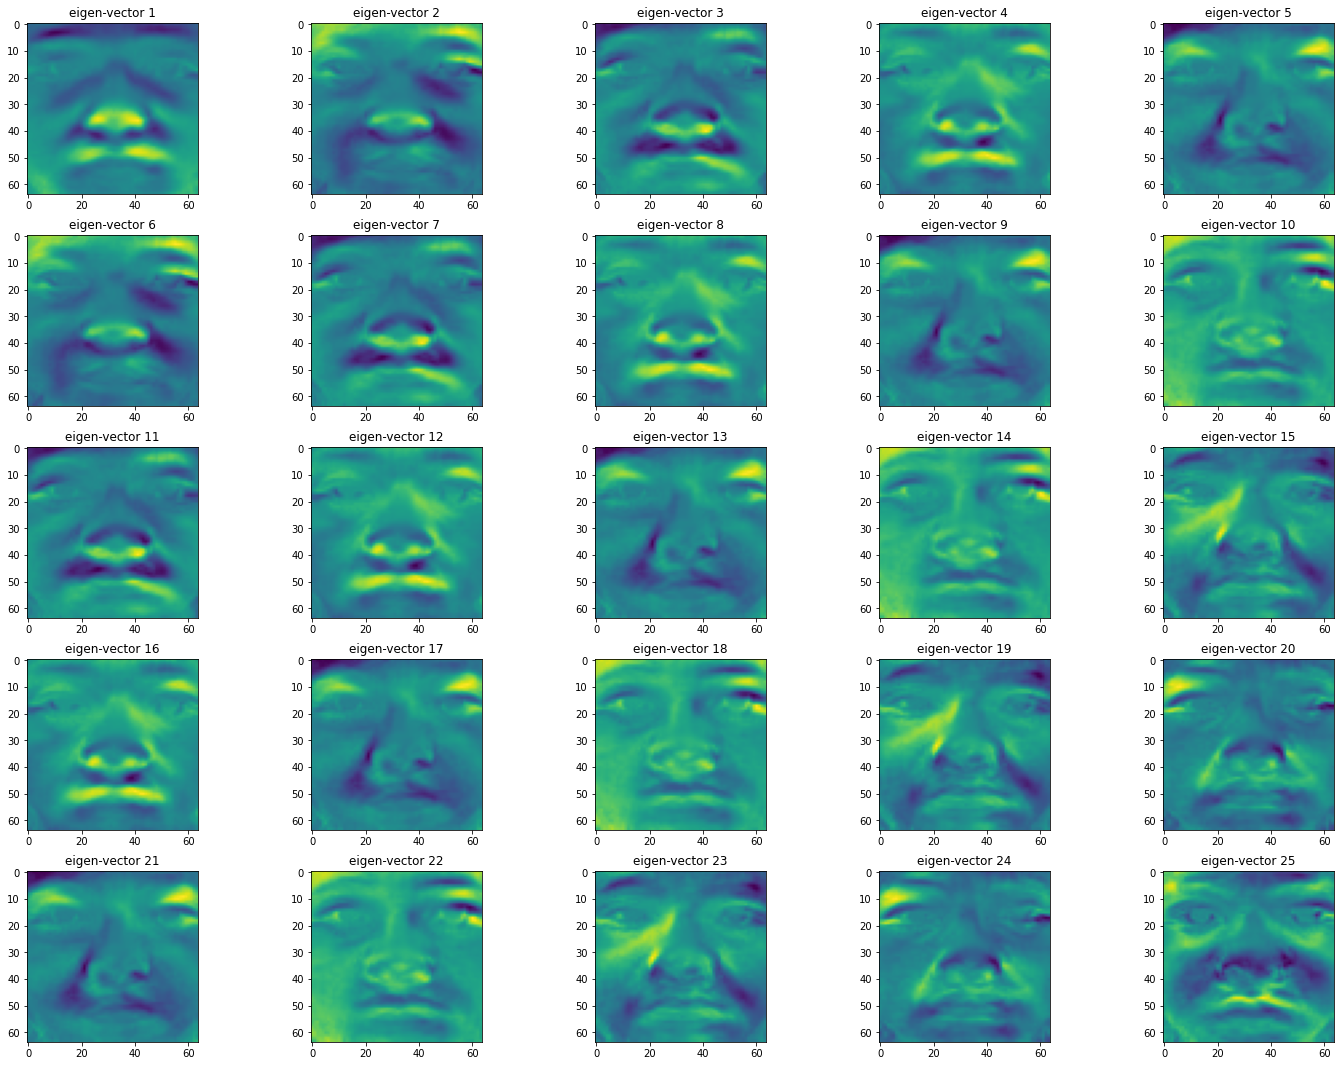

In [11]:
plot_images(5, 5, eigen_vectors, figsize=(20, 15), title="eigen-vector")


## Part D
Using the eigen-vectors convert inputs into new dimensions. Consider $d=15$, $d=35$ and $d=50$ and show the results. With using more dimension spaces how the reproduced images change?

In [12]:
## first we try d = 15
model_pca = PCA(n_components=15)
images_d15 = model_pca.fit_transform(flat_reducable_images)

Let's look at the 15 eigen-vectors we have

In [13]:
eigen_vectors15 = model_pca.components_

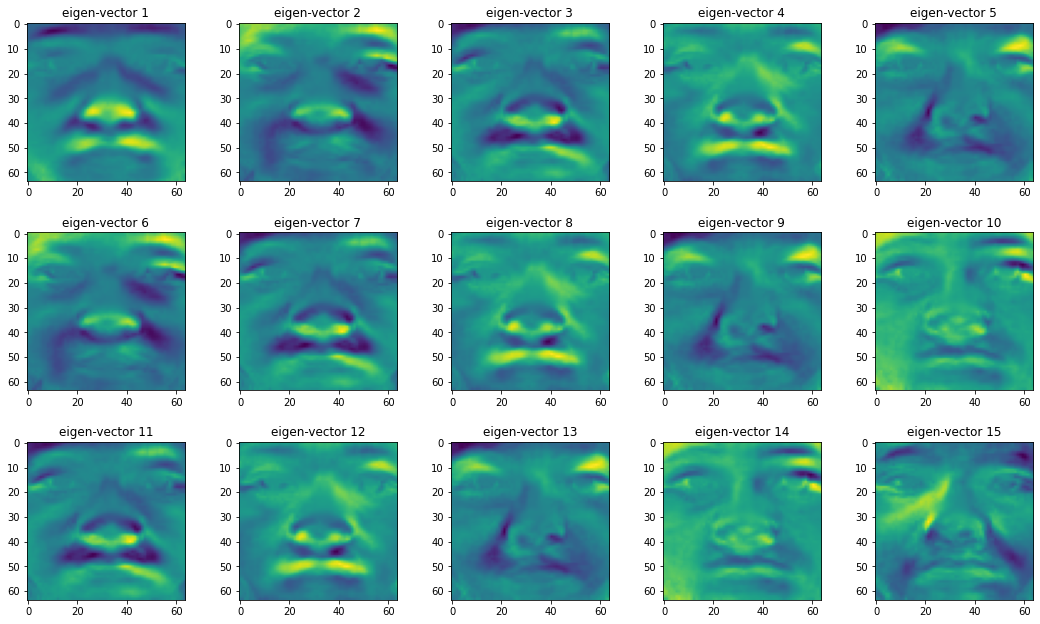

In [14]:
plot_images(3, 5, eigen_vectors15, figsize=(15, 9), title="eigen-vector")


Let's look at an reproduced image with $d=15$ <br>
To look at $15$ dimension images we converted them into $3*5$ images.

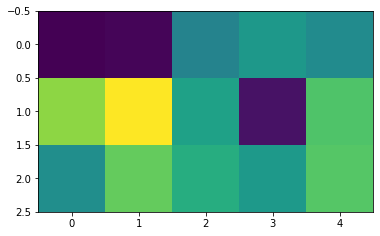

In [16]:
plt.imshow(images_d15[0].reshape(3,5)) 
plt.show()

As we can see in $15$ dimensions there is no such image to see, it's just some squar colors. <br>
Let's Look at images with $d=35$.

In [17]:
model_pca = PCA(n_components=35)
images_d35 = model_pca.fit_transform(flat_reducable_images)

eigen_vectors35 = model_pca.components_


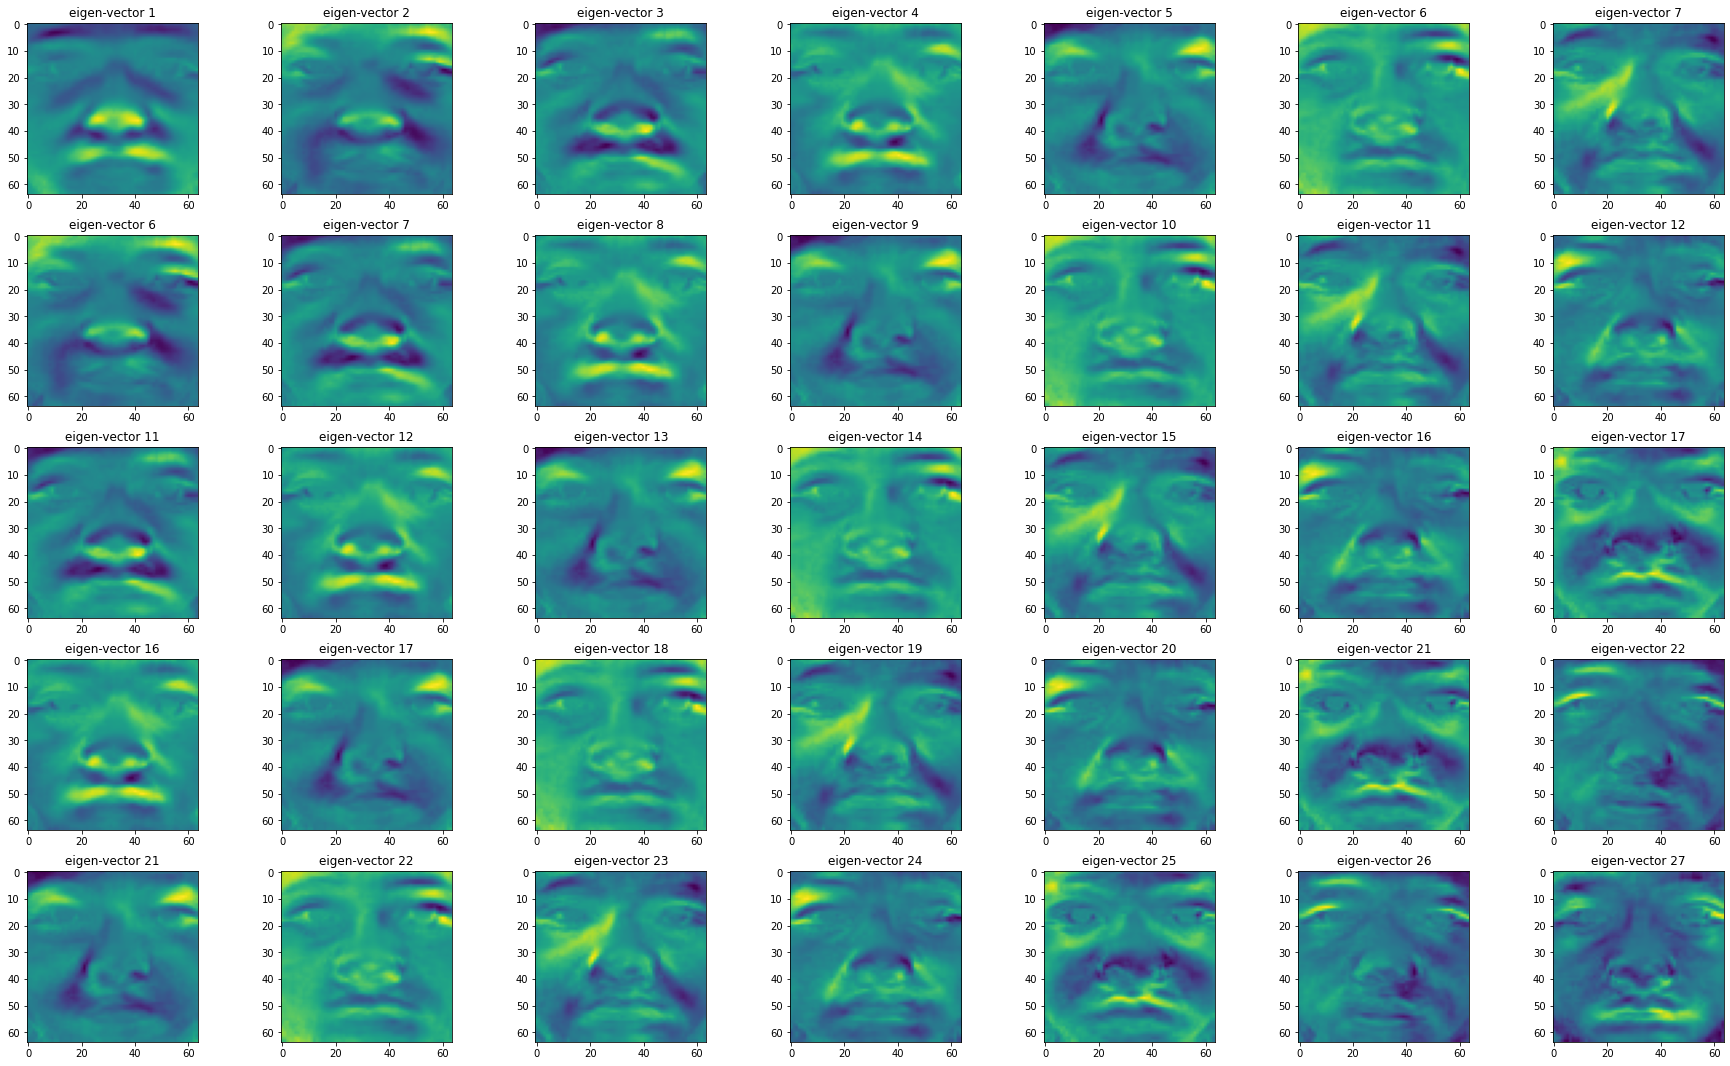

In [18]:
plot_images(5, 7, eigen_vectors35, figsize=(25, 15), title="eigen-vector")

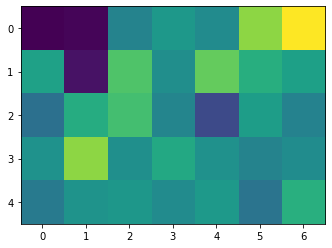

In [20]:
## reshape data into 5*7 images
plt.imshow(images_d35[0].reshape(5,7)) 
plt.show()

Now Let's take a look at images with $50$ diemnsionality.

In [22]:
model_pca = PCA(n_components=50)
images_d50 = model_pca.fit_transform(flat_reducable_images)

eigen_vectors50 = model_pca.components_

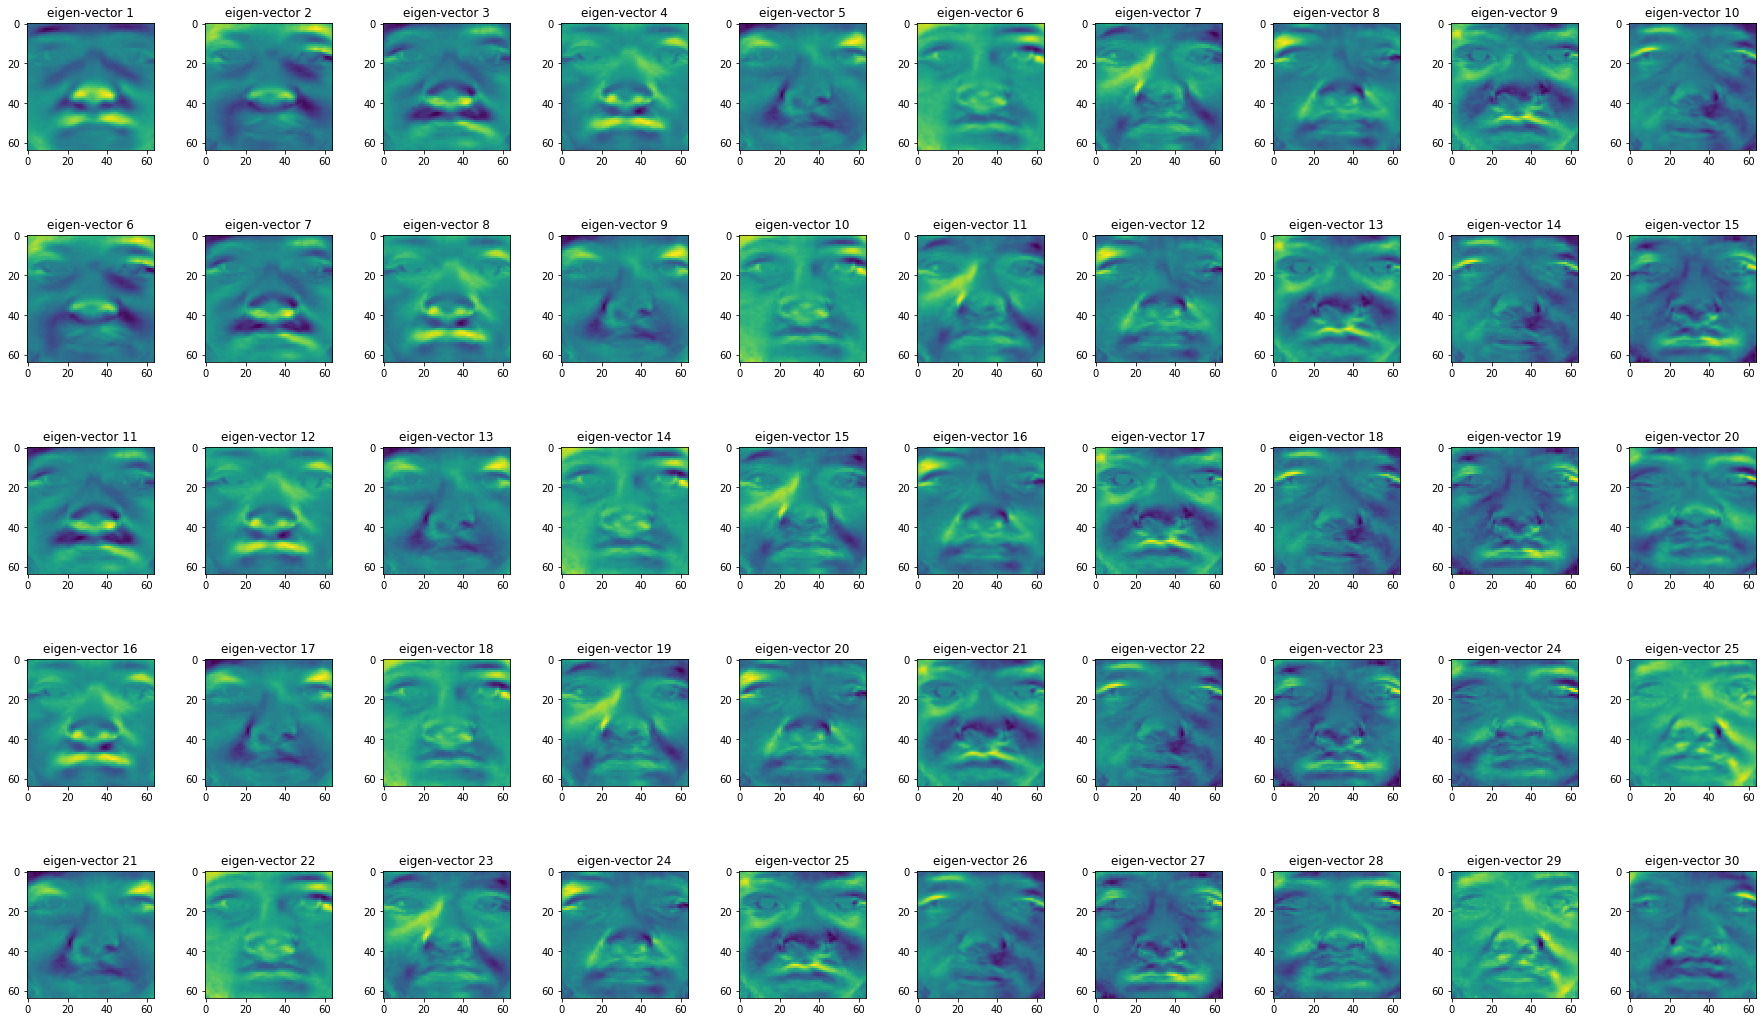

In [28]:
plot_images(5, 10, eigen_vectors50, figsize=(25, 15), title="eigen-vector")

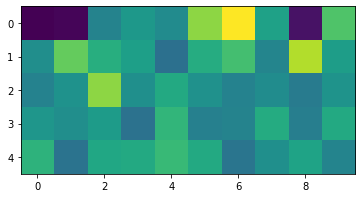

In [29]:
## reshape data into 5*10 images
plt.imshow(images_d50[0].reshape(5,10)) 
plt.show()

Each time we make the dimensionality more, the images shows more description of what is them and if we go more furthur the can have some meaning while we look at them. In other words if we make the dimensionality more, we can achieve the images of the faces.